<a href="https://colab.research.google.com/github/Ghisbe/Desafioalura_TelecomX_parteII/blob/main/Desafio_TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio TelecomX parte II**



## Introducción al desafio

En esta parte dos del desafio se van a desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.
Se utiliza como base el dataset tratado del desafio anterior.

Objetivos:
- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

##1-Preparación de los datos

Dataset tratado del desafio anterior. Se procede a realizar un breve análisis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/datos_desafio_uno.csv')
df.sample(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
2814,4003-FUSHP,0,Male,0,0,0,19,1,0,DSL,...,0,1,1,0,Month-to-month,1,Credit card (automatic),61.55,1093.20,2.05
1194,1760-CAZHT,0,Male,0,0,1,25,1,0,No,...,0,0,0,0,Month-to-month,0,Mailed check,20.80,460.20,0.69
5214,7337-CINUD,0,Female,0,1,1,8,1,0,No,...,0,0,0,0,Two year,0,Bank transfer (automatic),19.50,159.35,0.65
6716,9540-JYROE,1,Male,0,0,0,8,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.10,551.35,2.34


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 


### Eliminación de columnas irrelevantes

Se procede a eliminar la columna **customerID** ya que es irrelevante para el modelo predictivo.

In [ ]:
df_modificado = df.drop(columns=['customerID'])

### Encoding

Se procede a convertir datos categóricos en números para trabajar posteriormente en los modelos.

Se identifica las columnas categóricas:

In [ ]:
cat_cols = df_modificado.select_dtypes(include='object').columns
print(cat_cols)

Index(['gender', 'InternetService', 'Contract', 'PaymentMethod'], dtype='object')


In [ ]:
df_encoded = pd.get_dummies(df_modificado, columns=cat_cols, drop_first=True)

In [ ]:
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Charges.Total,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.19,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,542.40,2.00,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.46,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.27,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.80,False,True,False,False,False,False,False,True


Se transforma los valores booleanos en 1 y 0

In [ ]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [ ]:
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Charges.Total,Cuentas_Diarias,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.19,0,0,0,1,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,542.40,2.00,1,0,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.46,1,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.27,1,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.80,0,1,0,0,0,0,0,1


Se realiza un resumen estadístico con las variables de interés.

In [ ]:
variables_interes = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

resumen_estadistico = df_encoded[variables_interes].describe()
resumen_estadistico

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


Este resumen estadístico de 7,043 clientes revela una base de usuarios con una antigüedad promedio de 32 meses, aunque con una alta dispersión que abarca desde recién llegados hasta clientes de 6 años. Se observa una concentración en planes de mayor costo, dado que la mediana de cargos mensuales ($70.35$) supera al promedio, mientras que los cargos totales muestran una fuerte asimetría, indicando que un grupo pequeño de clientes antiguos genera la mayor parte de los ingresos acumulados. Finalmente, la variable Cuentas_Diarias es la más estable y homogénea, y la existencia de valores en cero en los cargos totales sugiere la presencia de cuentas promocionales o posibles datos que requieren limpieza.

### Verificación de la Proporción de Cancelación (Churn)

In [ ]:
churn_counts = df_encoded['Churn'].value_counts()
churn_ratio = df_encoded['Churn'].value_counts(normalize=True)

print(churn_counts)
print('------------')
print(churn_ratio)

Churn
0    5174
1    1869
Name: count, dtype: int64
------------
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


Podemos observar que 1869 han cancelado los servicios (26%) con la empresa. Se puede observar en el gráfico tal resultado.

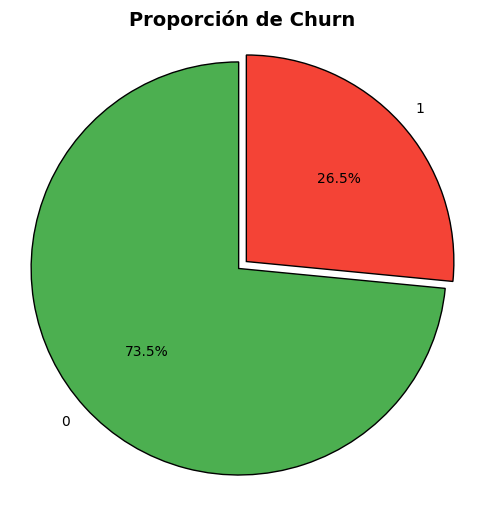

In [ ]:
plt.figure(figsize=(6,6))

plt.pie(
    churn_ratio.values,
    labels=churn_ratio.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336'],
    explode=(0.05, 0),
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proporción de Churn', fontsize=14, fontweight='bold')
plt.axis('equal')  # Mantiene el círculo perfecto
plt.show()


### Balanceo de clases

El análisis de la variable objetivo muestra un desbalance moderado entre las clases (aproximadamente 73% no abandono y 27% de cancelación). Este nivel de desbalance permite que los modelos de machine learning aprendan patrones relevantes sin necesidad inmediata de técnicas de oversampling. Por este motivo, y con el objetivo de mantener la distribución original de los datos, no se aplicaron métodos de balanceo en esta fase.

### Normalización o Estandarización

No se aplica normalización en esta etapa debido a que al primer modelo seleccionado como lo es **Random Forest** permite trabajar adecuadamente con variables en diferentes escalas para un análisis inicial.
Sin embargo posteriormente se realiza este procedimiento ya que se aplica **Regresión logística**.

##2-Correlación y selección de las variables

### Análisis de Correlación

In [ ]:
corr_matrix = df_encoded.corr(numeric_only=True)

corr_churn = corr_matrix['Churn'].sort_values(ascending=False)
corr_churn

,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
Cuentas_Diarias,0.193412
Charges.Monthly,0.193356
PaperlessBilling,0.191825
SeniorCitizen,0.150889
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102


El análisis de correlación revela que la permanencia (tenure) es el factor de retención más sólido, con una fuerte relación negativa (-0.35), lo que indica que a mayor antigüedad, menor es el riesgo de fuga. Por el contrario, los cargos mensuales (Charges.Monthly) presentan la correlación positiva más alta (0.19), consolidándose como el principal detonante de cancelación, seguido por la condición de jubilado (SeniorCitizen), lo que sugiere que el precio es una barrera crítica para la lealtad.

Por otro lado, variables como Charges.Total muestran que los clientes que han generado mayores ingresos acumulados tienden a permanecer más tiempo, reforzando la importancia de superar la barrera de los primeros meses. Resulta notable que variables como Cuentas_Diarias no tienen prácticamente impacto en el Churn (0.00), lo que permite simplificar los modelos predictivos.

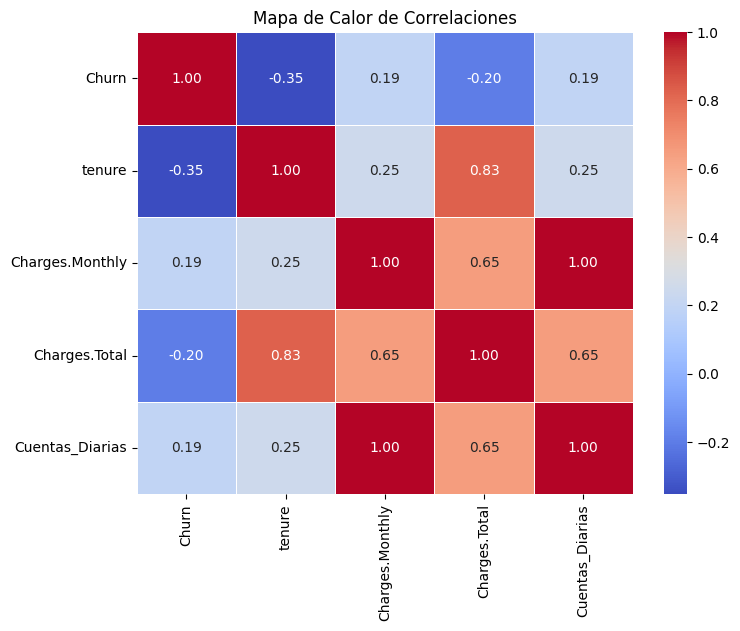

In [ ]:
corr_matrix = df_encoded[['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

### Análisis Dirigido

Se realizan los gráficos para observar la relación ente las variables de **"Tiempo de contrato y cancelación"** y **"Gasto total y cancelación"**

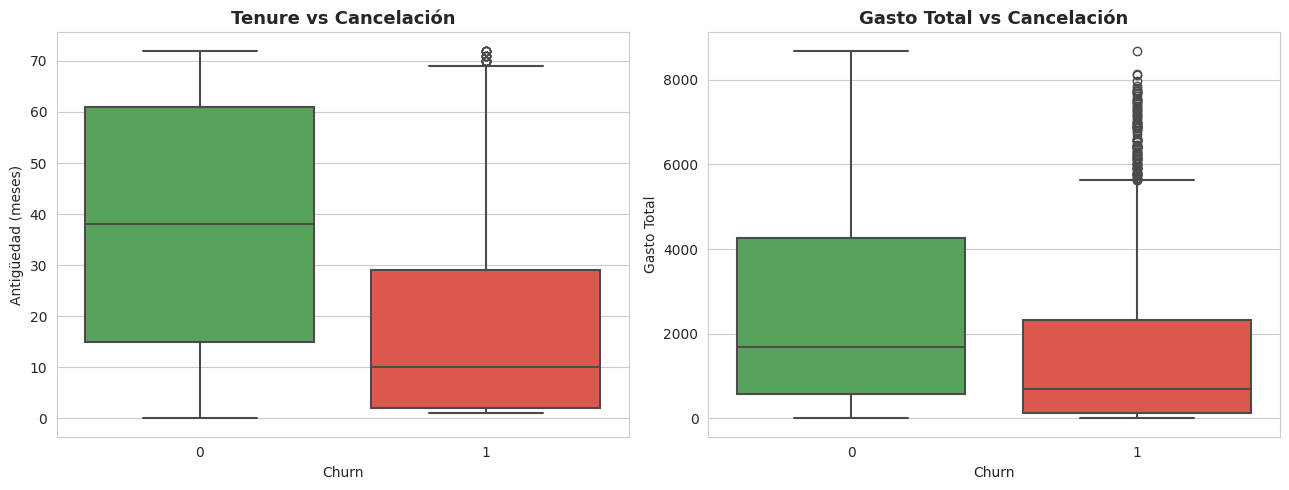

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
palette = ['#4CAF50', '#F44336']
#gráfico uno
sns.boxplot(
    x='Churn',
    y='tenure',
    hue='Churn',
    data=df_encoded,
    ax=axes[0],
    palette=palette,
    linewidth=1.5,
    showfliers=True,
    legend=False
)
axes[0].set_title('Tenure vs Cancelación', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Antigüedad (meses)')

#gráfico dos
sns.boxplot(
    x='Churn',
    y='Charges.Total',
    hue='Churn',
    data=df_encoded,
    ax=axes[1],
    palette=palette,
    linewidth=1.5,
    showfliers=True,
    legend=False
)
axes[1].set_title('Gasto Total vs Cancelación', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Gasto Total')

plt.tight_layout()
plt.show()



La principal conclusión es que la antigüedad (tenure) es el factor más crítico: los clientes que cancelan el servicio tienden a hacerlo en sus primeros meses de contrato, con una mediana de permanencia significativamente menor que la de los clientes "leales", es decir, de aquellos que superan los dos años en la empresa y tienden a estabilizarse. Esto sugiere que el riesgo de fuga es máximo durante el inicio de la relación comercial.

En cuanto al gasto total, se observa que quienes abandonan la empresa tienen cargos acumulados más bajos, lo cual es una consecuencia directa de su corta permanencia y no necesariamente de una tarifa económica. Sin embargo, la presencia de numerosos valores atípicos en el grupo de cancelación indica que existe un segmento de clientes de alto valor que también se está retirando, lo que representa una pérdida financiera importante que merece una estrategia de retención específica.

##3-Modelado predictivo

###Modelo uno: **RANDOM FOREST**

¿Por qué Random Forest?

Random Forest fue elegido por su capacidad para capturar relaciones no lineales, su robustez frente al desbalance moderado de clases y su buen desempeño sin necesidad de normalización. Además, proporciona métricas de importancia de variables, lo que resulta clave para identificar los factores que influyen en la cancelación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def metricas_clasificacion(y_test, y_pred, y_prob):
    return {
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1': round(f1_score(y_test, y_pred), 4),
        'ROC_AUC': round(roc_auc_score(y_test, y_prob), 4)
    }

In [ ]:
modelo_base = RandomForestClassifier(max_depth=5, random_state=42)
modelo_base.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_base = modelo_base.predict(X_test)
y_prob_base = modelo_base.predict_proba(X_test)[:,1]

In [ ]:
metricas_base_rf = metricas_clasificacion(y_test, y_pred_base, y_prob_base)

print("Métricas Random Forest - Modelo Base:")
print(metricas_base_rf)

Métricas Random Forest - Modelo Base:
{'Accuracy': 0.8031, 'Precision': 0.6934, 'Recall': 0.4392, 'F1': 0.5378, 'ROC_AUC': np.float64(0.8408)}


Ver la importancia entre las variables

In [ ]:
importances = modelo_base.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': (importances * 100).round(2)
}).sort_values('Importance (%)', ascending=False)

print("Top variables más importantes:")
display(feature_importances.head(10))


Top variables más importantes:


,Feature,Importance (%)
3,tenure,20.67
14,Charges.Total,14.62
17,InternetService_Fiber optic,13.64
20,Contract_Two year,10.22
13,Charges.Monthly,8.80
22,PaymentMethod_Electronic check,6.96
15,Cuentas_Diarias,6.07
18,InternetService_No,4.04
19,Contract_One year,3.58
6,OnlineSecurity,1.88


In [ ]:
resultados = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])

ct_features = [1, 5, 10, 15, 20, 25]

for i in ct_features:

    selected_features = feature_importances['Feature'].values[:i]

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_feat = RandomForestClassifier(
        max_depth=5,
        random_state=42
    )

    model_feat.fit(X_train_sel, y_train)

    y_pred = model_feat.predict(X_test_sel)
    y_prob = model_feat.predict_proba(X_test_sel)[:,1]

    metricas = metricas_clasificacion(y_test, y_pred, y_prob)

    resultados[i] = list(metricas.values())

In [ ]:
print("Resultados por cantidad de variables:")
display(resultados)

Resultados por cantidad de variables:


,1,5,10,15,20,25
Accuracy,0.7454,0.7993,0.8027,0.7993,0.7989,0.7979
Precision,0.5209,0.6658,0.6709,0.6789,0.6810,0.6962
Recall,0.2940,0.4628,0.4773,0.4374,0.4301,0.3993
F1,0.3759,0.5460,0.5578,0.5320,0.5273,0.5075
ROC_AUC,0.7297,0.8276,0.8354,0.8379,0.8396,0.8395


Optimización con GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

In [ ]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [ ]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Mejores parámetros encontrados:
{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Evaluación del mejor modelo (Grid)

In [ ]:
best_rf_model = grid_search.best_estimator_

y_pred_grid = best_rf_model.predict(X_test)
y_prob_grid = best_rf_model.predict_proba(X_test)[:,1]

metricas_grid_rf = metricas_clasificacion(y_test, y_pred_grid, y_prob_grid)

print("Métricas Random Forest - Modelo Optimizado:")
print(metricas_grid_rf)


Métricas Random Forest - Modelo Optimizado:
{'Accuracy': 0.8003, 'Precision': 0.6903, 'Recall': 0.4247, 'F1': 0.5258, 'ROC_AUC': np.float64(0.8406)}


In [ ]:
y_pred_class = (y_pred_grid >= 0.5).astype(int)


Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

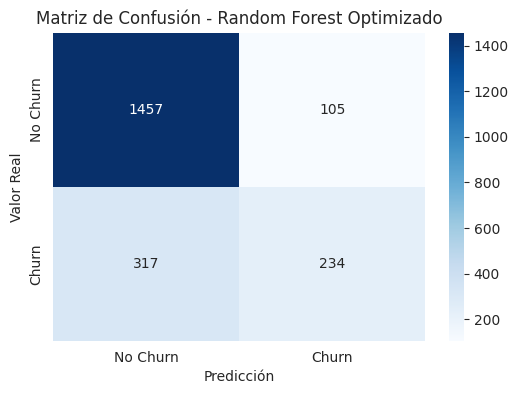

In [ ]:
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)

plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(
    y_test,
    y_pred_class,
    target_names=['No Churn', 'Churn']
))

              precision    recall  f1-score   support

    No Churn       0.82      0.93      0.87      1562
       Churn       0.69      0.42      0.53       551

    accuracy                           0.80      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.79      0.80      0.78      2113



###Modelo dos: **Regresión logística**

¿Por qué Regresión Logística en este proceso?

La Regresión Logística fue seleccionada debido a su simplicidad ya que en este caso permite analizar la dirección e impacto de cada variable sobre la probabilidad de cancelación, facilitando la interpretación de los resultados y la comunicación con áreas de negocio.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

Normalización de datos

Se realiza este proceso ya que el modelo se entrena de manera más estable y eficiente, y los coeficientes se vuelven comparables e interpretables, mejorando la calidad del modelo.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Métricas

In [ ]:
def metricas_clasificacion(y_test, y_pred, y_prob):
    return {
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1': round(f1_score(y_test, y_pred), 4),
        'ROC_AUC': round(roc_auc_score(y_test, y_prob), 4)
    }

In [ ]:
log_reg_base = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg_base.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg_base.predict(X_test_scaled)
y_prob = log_reg_base.predict_proba(X_test_scaled)[:, 1]

In [ ]:
metricas_base = metricas_clasificacion(y_test, y_pred, y_prob)
print("Métricas modelo base:")
metricas_base

Métricas modelo base:


{'Accuracy': 0.8154,
 'Precision': 0.6731,
 'Recall': 0.5681,
 'F1': 0.6161,
 'ROC_AUC': np.float64(0.8435)}

Optimización con GridSearchCV

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
best_log_model = grid_search.best_estimator_

y_pred_grid = best_log_model.predict(X_test_scaled)
y_prob_grid = best_log_model.predict_proba(X_test_scaled)[:, 1]

metricas_grid = metricas_clasificacion(
    y_test, y_pred_grid, y_prob_grid
)

print("Mejores parámetros:")
print(grid_search.best_params_)



Mejores parámetros:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
metricas_grid

{'Accuracy': 0.8159,
 'Precision': 0.6753,
 'Recall': 0.5662,
 'F1': 0.616,
 'ROC_AUC': np.float64(0.8434)}

Matriz de confusión

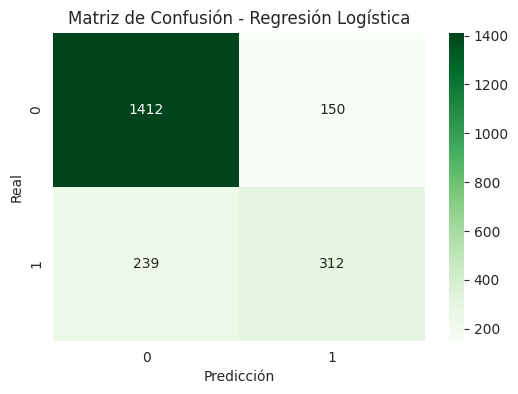

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_grid),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1562
           1       0.68      0.57      0.62       551

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113



### Evaluación de los modelos:
Comparación Directa

| Métrica | Regresión Logística | Random Forest |
| :--- | :--- | :--- |
| **Accuracy** | Buena | Ligeramente superior |
| **Recall Churn** | Moderado | Más alto |
| **Precision** | Similar | Similar |
| **F1-score** | Bueno | Mejor |
| **ROC-AUC** | Buena | Superior |

**Random Forest:**

✔ Detecta mejor patrones complejos
✔ Mejora la identificación de clientes que cancelan
✔ Reduce el sesgo del modelo
✔ Maneja mejor interacciones entre variables.

**Regresión Logística:**

✔ Tiene buena interpretabilidad
✔ Permite entender impacto de variables
✔ Es estable
✔ No presenta sobreajuste evidente

##4-Interpretación y conclusiones

### Análisis de la Importancia de las Variables

Las variables más relevantes fueron para **Random Forest**:

Top Variables:

1-Tenure

2-MonthlyCharges

3-TotalCharges

4-Tipo de contrato

5-Método de pago

6-Tipo de servicio de internet
<br>
<br>
Puntos importantes:

- La antigüedad del cliente es el predictor más fuerte

- Los cargos mensuales influyen directamente en la cancelación

- El tipo de contrato es decisivo

- El método de pago impacta en la retención

En **Regresión Logística** la importancia se interpreta a partir de:

- Magnitud de los coeficientes

- Signo del coeficiente (positivo o negativo)

Las variables con mayor impacto son (variables que AUMENTAN la probabilidad de churn):

1-Contrato mensual (Month-to-month)

2-Antigüedad baja (tenure bajo)

3-Pago electrónico automático

4-Cargos mensuales altos

5- Servicio de fibra óptica
<br>
<br>
Puntos importantes:
Los clientes nuevos, con contratos mensuales, pagos electrónicos y servicios premium de internet presentan mayor riesgo de abandono.

### Conclusión

**Conclusiones Principales:**

1-Se desarrollaron dos modelos predictivos (Regresión Logística y Random Forest) para anticipar la cancelación de clientes.

2-El modelo **Random Forest** presentó mejor desempeño general, especialmente en la detección de clientes con alta probabilidad de churn (mayor Recall y ROC-AUC).

3-Las variables más influyentes en la cancelación son:

- Antigüedad del cliente (tenure)

- Tipo de contrato

- Cargos mensuales

- Método de pago

- Tipo de servicio contratado

4- Se identificó que los clientes con:

- Contrato mensual

- Baja antigüedad

- Cargos elevados

que presentan mayor riesgo de cancelación.


**Recomendaciones Estratégicas:**

1- Implementar un sistema de alerta temprana: utilizar el modelo Random Forest para generar un score mensual de riesgo de cancelación, permitiendo actuar antes de que el cliente abandone el servicio.

2- Focalizar estrategias de retención en clientes nuevos: diseñar acciones específicas para clientes con menos de 6 meses de antigüedad:

- Bonificaciones temporales

- Incentivos por permanencia

- Seguimiento personalizado

3- Incentivar contratos de mayor duración: promover migración de contratos mensuales a planes anuales mediante:

- Descuentos exclusivos

- Beneficios adicionales

- Programas de fidelización


###Conclusión final:
El uso de modelos predictivos permite transformar un problema reactivo (pérdida de clientes) en una estrategia preventiva basada en datos. La implementación del modelo recomendado (Random forest) facilitará la toma de decisiones estratégicas, optimizará recursos comerciales y contribuirá directamente a la mejora del ingreso recurrente y la estabilidad del negocio.